<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/15_0_Understand_Model_Behavior_During_Training_By_Plotting_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand Model Behavior During Training By Plotting History

You can learn a lot about neural networks and deep learning models by observing their performance over time during training. In this lesson you will discover how you can review and visualize the performance of deep learning models over time during training in Python with Keras.

# Access Model Training History in Keras

Keras provides the capability to register callbacks when training a deep learning model. One of the default callbacks that is registered when training all deep learning models is the History callback. It records training metrics for each epoch. 

This includes the loss and the accuracy (for classiﬁcation problems) as well as the loss and accuracy for the validation dataset, if one is set. The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned. 


In [1]:
# Visualize training history 
from keras.models import Sequential 
from keras.layers import Dense 
import matplotlib.pyplot as plt 
import numpy as np

Using TensorFlow backend.


In [0]:
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",") 
# split into input (X) and output (Y) variables 
X = dataset[:,0:8] 
Y = dataset[:,8] 

In [0]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed) 

In [0]:
# create model 
model = Sequential() 
model.add(Dense(12, input_dim=8, kernel_initializer= 'uniform' , activation= 'relu' )) 
model.add(Dense(8, kernel_initializer= 'uniform' , activation= 'relu' )) 
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' )) 

In [0]:
# Compile model 
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])

In [0]:
# Fit the model 
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

In [10]:
# list all data in history 
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


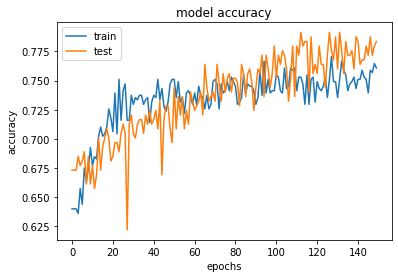

In [14]:
plt.plot(history.history[ 'accuracy' ]) 
plt.plot(history.history[ 'val_accuracy' ]) 
plt.title( 'model accuracy'  ) 
plt.ylabel( 'accuracy'  ) 
plt.xlabel( 'epochs' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

The plots are provided below. The history for the validation dataset is labeled test by convention as it is indeed a test dataset for the model. 

From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.

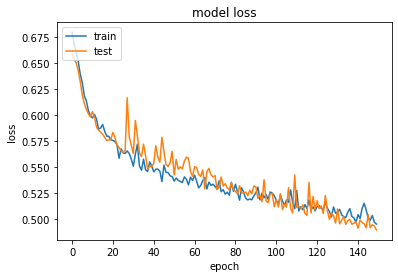

In [15]:
# summarize history for loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.